### Imports

In [88]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams['font.size'] = 14

### Dataframe

In [89]:
dataframe = pd.read_csv("IntelData.csv")
newDF = dataframe.copy(deep=True)
newDF.drop(['Distribution Center','Product Offering','Generation','ASP Group','Week','Customer Orders'], axis = 1, inplace = True)
newDF = newDF.set_index([newDF.groupby('SKU')['SKU'].cumcount(), 'SKU'])['Forecasted Demand'].unstack()
newDF.index.rename('Index', inplace=True)
bin01 = newDF.describe().loc[['mean','count','std']]

In [90]:
var = newDF.var()
var = var.to_frame("var")
bin01 = bin01.transpose()
bin01['var'] = var
bin01 = bin01.sort_values(by="var", axis=0, ascending=False)
bin01['mu-sigma'] = bin01['mean'] - bin01['std']
bin01['mu+sigma'] = bin01['mean'] + bin01['std']
bin01 = bin01[['count','mu-sigma','mean','mu+sigma','std','var']]
vList = list(bin01['var'])
vList == sorted(vList,reverse=True)

True

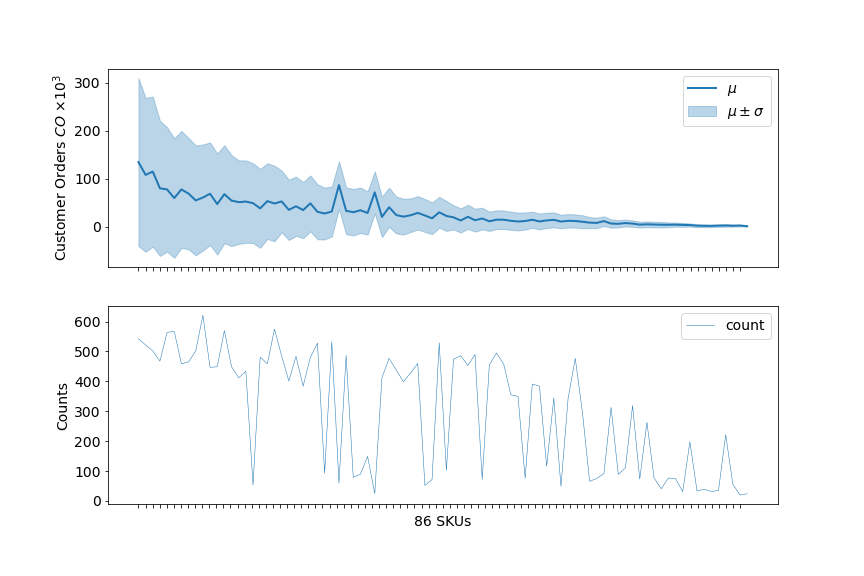

In [100]:
num = "Distribution of SKUs"
if plt.fignum_exists(num):plt.close(num)
fig,ax=plt.subplots(num=num, nrows=2, figsize=((12,8)))

idx = np.linspace(0,len(bin01),len(bin01))

ax[0].plot(idx,bin01['mean']/1e3, color="C0", lw=2,label = "$\mu$")
ax[0].fill_between(idx,bin01['mu-sigma']/1e3,bin01['mu+sigma']/1e3,color="C0",alpha=.3, label="$\mu \pm \sigma$")
ax[0].set(ylabel="Customer Orders $CO$ $\\times 10^3$")
ax[0].legend()
ax[0].set_xticklabels([])
ax[0].xaxis.set_ticks(np.arange(0, 86, 1))

ax[1].plot(idx,bin01['count'].values, color="C0",lw=.5, label="count")
ax[1].legend()
ax[1].set(xlabel="86 SKUs",ylabel="Counts")
ax[1].set_xticklabels([])
ax[1].xaxis.set_ticks(np.arange(0, 86, 1));



In [ ]:
plotMe = newDF.describe().loc[['mean','std','variance']]

In [ ]:
plotMe.sort_values(by='var', axis=1, ascending=False)

In [ ]:
plotMe = plotMe.transpose()
plotMe

In [ ]:
plotMe['mu-sigma'] = plotMe['mean'] - plotMe['std']
plotMe['mu+sigma'] = plotMe['mean'] + plotMe['std']

In [ ]:
sigmaColumn = plotMe['std']
plotMe.drop('std',axis=1,inplace=True)
plotMe

In [ ]:
plotMe = plotMe.sort_values(by='mean', axis=0, ascending=False)

In [ ]:
plotMe = plotMe[["mu-sigma", "mean", "mu+sigma"]]

In [ ]:
plotMe

In [ ]:
plt.rcParams['font.size'] = 14

In [ ]:
plotMe

In [ ]:
num = "Distribution of SKUs"
if plt.fignum_exists(num):plt.close(num)
fig,ax=plt.subplots(num=num)

idx = np.linspace(0,86,86)

ax.plot(idx,plotMe['mean']/1e3, color="C0", lw=2,label="$\mu$")
ax.fill_between(idx,plotMe['mu-sigma']/1e3,plotMe['mu+sigma']/1e3,color="C0",alpha=.3, label="$\mu \pm 1\sigma$")

ax.set(xlabel="SKUs", ylabel="Customer Orders $CO$ $\\times 10^3$")
ax.legend()

#https://stackoverflow.com/questions/50802556/how-to-plot-a-vertical-area-plot-with-pandas

#https://stackoverflow.com/questions/44982574/how-to-plot-vertical-scatter-using-only-matplotlib

In [ ]:
plt.close()
newDF.boxplot(column=['SKU-A-2', 'SKU-B-3', 'SKU-W-4','SKU-T-5']) #Picked arbitrary 4 columns.

In [ ]:
## Box plot providing intuition about difference in variances. 

In [ ]:
def funcToList(inputList):
    return [x for x in inputList if x == x]

In [ ]:
skuA2 = funcToList(list(newDF['SKU-A-2']))
skuB3 = funcToList(list(newDF['SKU-B-3']))
skuW4 = funcToList(list(newDF['SKU-W-4']))
skuT5 = funcToList(list(newDF['SKU-T-5']))

In [ ]:
theList = []
theList.append(skuA2)
theList.append(skuB3)
theList.append(skuW4)
theList.append(skuT5)


In [ ]:
from scipy.stats import bartlett
stat, p = bartlett(*theList)

In [ ]:
stat

In [ ]:
p

In [ ]:
# p value less than 0.05 indicating UNEQUAL variances.

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [ ]:
dataframe

In [ ]:
poC = dataframe.loc[dataframe['Product Offering'] == "C"]

In [ ]:
poC

In [ ]:
poC = poC.drop(['Distribution Center','Product Offering','Generation','SKU','ASP Group','Week'],axis=1)

In [ ]:
poC

In [ ]:
poC['FA'] = poC['Forecasted Demand']/(poC['Forecasted Demand'] + poC['Customer Orders'])

In [ ]:
poC

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection='3d')
ax.grid()

x = np.linspace(min(poC['Forecasted Demand']),max(poC['Forecasted Demand']),100)
y = np.linspace(min(poC['FA']),max(poC['FA']),1873)
z = np.linspace(min(poC['FA']),max(poC['FA']),1873)




x = poC['Forecasted Demand']
y = poC['FA']
z = np.linspace(0,1,1873)



ax.plot3D(x, y, z)
ax.set_xlabel('Forecasted Demand', labelpad=20)
ax.set_ylabel('Error', labelpad=20)
ax.set_zlabel('Density', labelpad=20)

In [ ]:
plt.close('all')
plt.hist(poC['FA'], density = False, bins= 20, edgecolor="black")
plt.show()